In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [3]:
df = pd.read_csv('/content/Datasets/Customer Churn Dataset/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [13]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [16]:
pd.set_option('display.max_columns', None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Model 1 - Baseline Performance without feature engineering

In [17]:
x_base = df.drop('Churn', axis=1)
y_base = df['Churn']

In [18]:
numerical_features_base = x_base.select_dtypes(include=np.number).columns.to_list()
categorical_features_base = x_base.select_dtypes(include=['object']).columns.to_list()

preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_base)
    ])

x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(x_base, y_base, test_size=0.2, random_state=42, stratify = y_base)

baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor_base),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

baseline_model.fit(x_train_base, y_train_base)
y_pred_base = baseline_model.predict(x_test_base)

baseline_model.fit(x_train_base, y_train_base)
y_pred_base = baseline_model.predict(x_test_base)

print(classification_report(y_test_base, y_pred_base))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [19]:
preprocessor_base

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['customerID', 'gender', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [20]:
baseline_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

Feature Engineering

In [21]:
df_eng =  df.copy()

In [22]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [23]:
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 Years', '1-2 Years', '2-4 Years', '4-5 Years', '5-6 Years']

df_eng['Tenure_Group'] = pd.cut(
    df_eng['tenure'],
    bins=bins,
    labels=labels,
    right=False
)

In [24]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Years
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Years
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Years


In [25]:
df_eng['MultipleLines'] = df_eng['MultipleLines'].replace({'No phone service': 'No'})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_eng[col] = df_eng[col].replace({'No internet service': 'No'})

In [26]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [27]:
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [28]:
df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure']+1)

In [29]:
x_eng = df_eng.drop('Churn', axis=1)
y_eng = df_eng['Churn']
numerical_features_eng = x_eng.select_dtypes(include=np.number).columns.to_list()
categorical_features_eng = x_eng.select_dtypes(include=['object']).columns.to_list()

preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_eng),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_eng)
    ])

x_train_eng, x_test_eng, y_train_eng, y_test_eng = train_test_split(x_eng, y_eng, test_size=0.2, random_state=42, stratify = y_eng)

enhanced_model = Pipeline(steps=[
    ('preprocessor', preprocessor_eng),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

enhanced_model.fit(x_train_eng, y_train_eng)
y_pred_end = enhanced_model.predict(x_test_eng)

enhanced_model.fit(x_train_eng, y_train_eng)
y_pred_eng = enhanced_model.predict(x_test_eng)

print(classification_report(y_test_eng, y_pred_eng))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [30]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_eng),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(x_train_eng, y_train_eng)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'monthly_charge_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [31]:
feature_name = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

In [32]:
importances = rf_pipeline.named_steps['classifier'].feature_importances_

In [33]:
feature_importance_df = pd.DataFrame({'Feature': feature_name, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

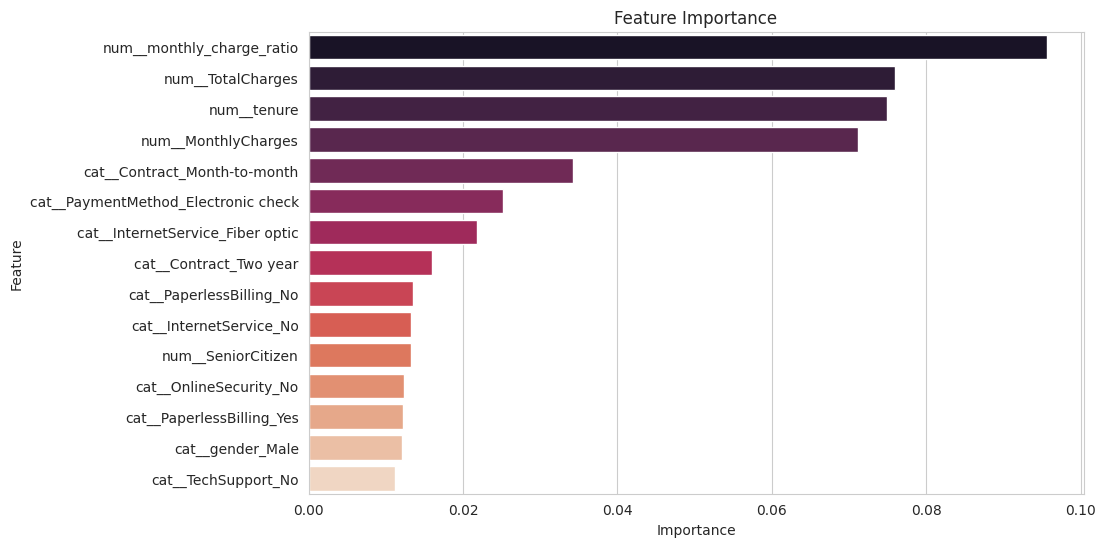

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette = 'rocket', hue = 'Feature', legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(random_state=42)

Selector = SelectFromModel(rf_selector, threshold='median', prefit = False)

feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_eng),
    ('selector', Selector)
])

feature_selection_pipeline.fit(x_train_eng, y_train_eng)

x_train_selected = feature_selection_pipeline.transform(x_train_eng)
x_test_selected = feature_selection_pipeline.transform(x_test_eng)

print(f"Original training data shape: {x_train_eng.shape}")
print(f"Selected training data shape: {x_train_selected.shape}")

Original training data shape: (5634, 22)
Selected training data shape: (5634, 2837)


Exploring additional feature engineering

In [40]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

In [41]:
df['is_new_customer'] = (df['tenure'] <= 6).astype(int)

In [42]:
df['avg_monthly_spend'] = df['TotalCharges'] / (df['tenure'] + 1)

In [43]:
df['high_monthly_charges'] = (
    df['MonthlyCharges'] > df['MonthlyCharges'].median()
).astype(int)

In [44]:
binary_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [45]:
df = pd.get_dummies(
    df,
    columns=['gender', 'PaymentMethod', 'MultipleLines'],
    drop_first=True
)

Feature Selection

In [51]:
X = df.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = df['Churn']

In [55]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

rfe = RFE(
    estimator=model,
    n_features_to_select=10
)

rfe.fit(X_scaled, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [61]:
n_features_to_select = [5, 8, 10, 15]

In [62]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(
    LogisticRegression(max_iter=1000),
    threshold='mean'
)

selector.fit(X_scaled, y)

SelectFromModel(estimator=LogisticRegression(max_iter=1000), threshold='mean')

In [64]:
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X_encoded.columns,
    index=X_encoded.index
)

selected_features = X_scaled_df.columns[rfe.support_]
print(selected_features)


Index(['tenure', 'TotalCharges', 'avg_monthly_spend',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year'],
      dtype='object')


Evaluating Alternative Models

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = df['Churn']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [69]:
!pip install xgboost

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
!pip install lightgbm

In [72]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


LGBMClassifier(learning_rate=0.05, n_estimators=300, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)

SVC(C=1, probability=True, random_state=42)

In [74]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob)
    }

In [75]:
results = {}

results['RandomForest'] = evaluate_model(rf, X_test, y_test)
results['GradientBoosting'] = evaluate_model(gb, X_test, y_test)
results['XGBoost'] = evaluate_model(xgb, X_test, y_test)
results['LightGBM'] = evaluate_model(lgbm, X_test, y_test)
results['SVM'] = evaluate_model(svm, X_test_scaled, y_test, scaled=True)

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1,ROC_AUC
RandomForest,0.791341,0.636054,0.500000,0.559880,0.826619
GradientBoosting,0.797019,0.652778,0.502674,0.567976,0.843844
XGBoost,0.801987,0.658863,0.526738,0.585438,0.841954
LightGBM,0.789212,0.619938,0.532086,0.572662,0.831069
SVM,0.794890,0.655678,0.478610,0.553323,0.802630


Hyperparameter Tuning

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             scoring='roc_auc')

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

gb_grid = GridSearchCV(
    gb,
    gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

gb_best = gb_grid.best_estimator_
gb_grid.best_params_


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

xgb_param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb,
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [79]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm_param_dist = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20]
}

lgbm_random = RandomizedSearchCV(
    lgbm,
    lgbm_param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

lgbm_random.fit(X_train, y_train)

lgbm_best = lgbm_random.best_estimator_
lgbm_random.best_params_


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


{'num_leaves': 31, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf'],
    'svm__gamma': ['scale', 0.01, 0.1]
}

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

svm_best = svm_grid.best_estimator_
svm_grid.best_params_


{'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

Evaluating the models

In [82]:
from sklearn.metrics import roc_auc_score

models = {
    'RandomForest': rf_grid,
    'GradientBoosting': gb_best,
    'XGBoost': xgb_best,
    'LightGBM': lgbm_best,
    'SVM': svm_best
}

results = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    results[name] = roc_auc_score(y_test, y_prob)

pd.DataFrame.from_dict(results, orient='index', columns=['ROC_AUC'])

,ROC_AUC
RandomForest,0.843323
GradientBoosting,0.845886
XGBoost,0.847733
LightGBM,0.843657
SVM,0.836067
